In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
Glass_Data=pd.read_csv("glass.csv")
Glass_Data.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
151,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.0,0.00,3
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,2
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.0,0.00,5
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
28,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.0,0.00,1
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.0,0.00,2
121,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00,2
70,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.0,0.12,2
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.0,0.08,2


In [3]:
Glass_Data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
Glass_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<AxesSubplot:>

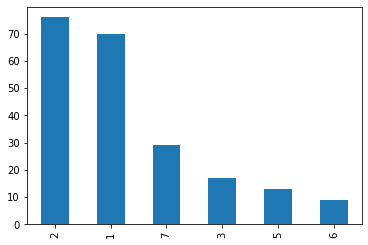

In [5]:
Glass_Data['Type'].value_counts().plot(kind='bar')

In [6]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='RI', ylabel='Density'>

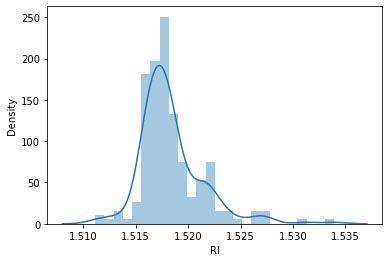

In [7]:
sns.distplot(Glass_Data['RI'])

<AxesSubplot:xlabel='Na', ylabel='Density'>

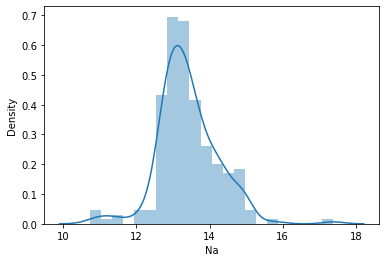

In [8]:
sns.distplot(Glass_Data['Na'])

In [9]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
Glass_Data1=pd.DataFrame(trans.fit_transform(Glass_Data.iloc[:,0:9]))
Glass_Data1.sample(5)

,0,1,2,3,4,5,6,7,8
55,0.287094,0.258647,0.603563,0.311526,0.694643,0.090177,0.337361,0.0,0.470588
12,0.208077,0.323308,0.763920,0.345794,0.619643,0.111111,0.243494,0.0,0.470588
178,0.313433,0.560902,0.498886,0.414330,0.458929,0.000000,0.355948,0.0,0.000000
113,0.341089,0.410526,0.853007,0.302181,0.489286,0.091787,0.258364,0.0,0.274510
153,0.217296,0.404511,0.757238,0.289720,0.514286,0.095008,0.268587,0.0,0.000000


In [10]:
Glass_Data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [11]:
Glass_Data1.columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Glass_Data1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [12]:
x=Glass_Data1
y=Glass_Data.iloc[:,9]

In [26]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [27]:
neigh=KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test)

In [28]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)

0.6976744186046512

# Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
n_neighbors = np.array([2*i+1 for i in range(0,20)])
param_grid = dict(n_neighbors=n_neighbors)

In [31]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [32]:
print(grid.best_score_)
print(grid.best_params_ )

0.6590909090909091
{'n_neighbors': 5}


# Elastic net

In [20]:
from sklearn.linear_model import ElasticNet 
 
e_net = ElasticNet(alpha = 1,l1_ratio=0.1) 
e_net.fit(x_train, y_train) 
 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 


Mean Squared Error on test set 3.5229301807521063


,Columns,Coefficient Estimate
0,RI,-0.000000
1,Na,0.031630
2,Mg,-0.403909
3,Al,0.094430
4,Si,0.000000
5,K,-0.000000
6,Ca,-0.000000
7,Ba,0.089660
8,Fe,-0.000000


In [21]:
glass_data=Glass_Data1.drop(['RI','Si','K','Ca','Fe'],axis=1)
glass_data.head()

,Na,Mg,Al,Ba
0,0.437594,1.000000,0.252336,0.0
1,0.475188,0.801782,0.333333,0.0
2,0.421053,0.790646,0.389408,0.0
3,0.372932,0.821826,0.311526,0.0
4,0.381955,0.806236,0.295950,0.0


In [22]:
x1=glass_data.iloc[:,0:3]
y1=Glass_Data.iloc[:,9]

In [23]:
x1_train, x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size=0.2,random_state=5)

In [24]:
neigh1=KNeighborsClassifier(n_neighbors=19)
neigh1.fit(x1_train,y1_train)
y_pred1=neigh1.predict(x1_test)

In [25]:
metrics.accuracy_score(y_pred1,y1_test)

0.7209302325581395